In [1]:
# 01_eda.ipynb
# Exploratory Data Analysis for Project 1 - Sales & Customer Analytics Dashboard

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
sales = pd.read_csv("../data/sales data-set.csv")
features = pd.read_csv("../data/Features data set.csv")
stores = pd.read_csv("../data/stores data-set.csv")

# Quick checks
print("Sales dataset:")
print(sales.head())

print("\nFeatures dataset:")
print(features.head())

print("\nStores dataset:")
print(stores.head())


Sales dataset:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

Features dataset:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2    

In [3]:
# Dataset info
print("Sales dataset info:")
print(sales.info())

print("\nFeatures dataset info:")
print(features.info())

print("\nStores dataset info:")
print(stores.info())

# Check for missing values
print("\nMissing values in Sales:")
print(sales.isnull().sum())

print("\nMissing values in Features:")
print(features.isnull().sum())

print("\nMissing values in Stores:")
print(stores.isnull().sum())


Sales dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

Features dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkD

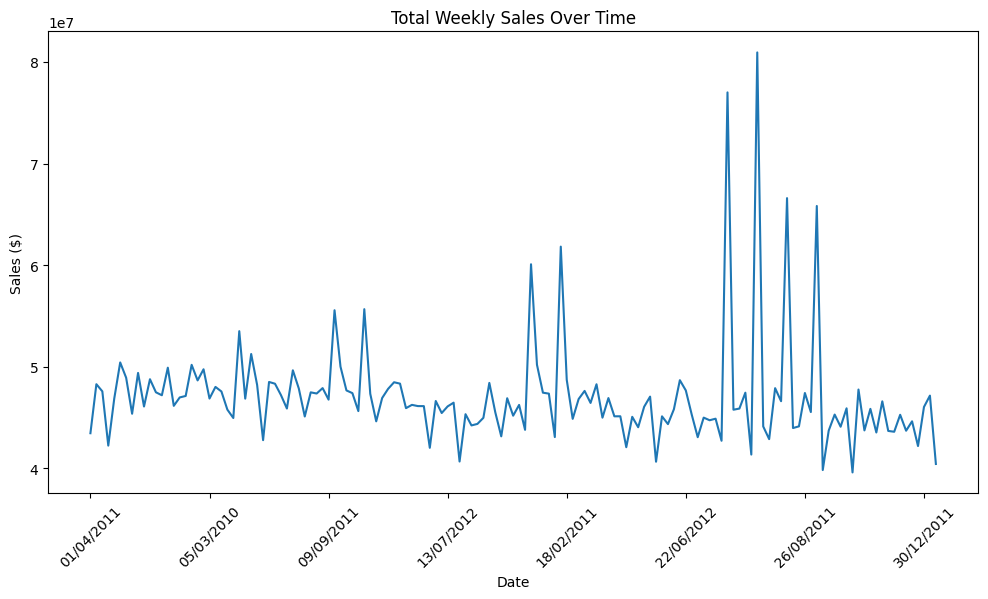

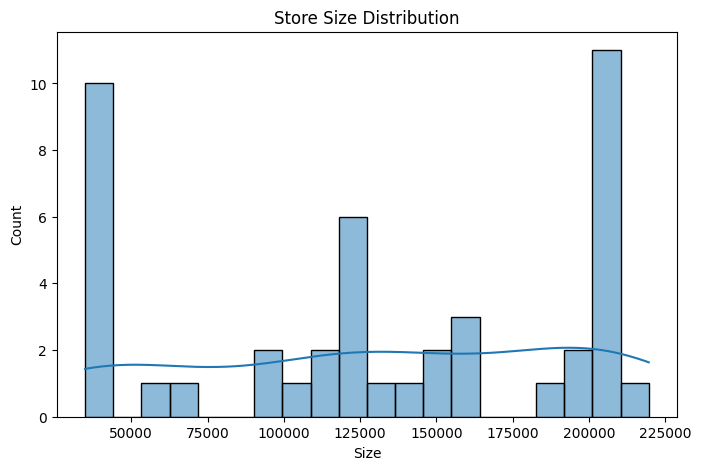

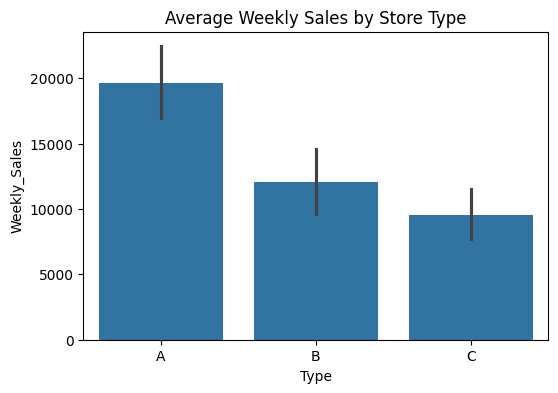

In [4]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Total weekly sales trend
plt.figure(figsize=(12,6))
sales.groupby("Date")["Weekly_Sales"].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.show()

# Store sizes distribution
plt.figure(figsize=(8,5))
sns.histplot(stores["Size"], bins=20, kde=True)
plt.title("Store Size Distribution")
plt.show()

# Average sales by store type
avg_sales = sales.groupby("Store")["Weekly_Sales"].mean().reset_index()
avg_sales = avg_sales.merge(stores[["Store","Type"]], on="Store", how="left")

plt.figure(figsize=(6,4))
sns.barplot(x="Type", y="Weekly_Sales", data=avg_sales, estimator="mean")
plt.title("Average Weekly Sales by Store Type")
plt.show()
